# Titanic

## 1. 問題定義

欄位說明:

PassengerId: 乘客編號
Survived: 是否存活
Pclass: 艙等
Name: 姓名
Sex: 性別
Age: 年齡
SibSp: 同行兄弟姊妹/配偶數
Parch: 同行父母/子女數
Ticket: 票號
Fare: 船票價格
Cabin: 客艙編號
Embarked: 登船港口

## 2. 載入函式庫與基本設定

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import spi

## 3. 載入資料

In [406]:
TRAIN_RAW_DATA = 'https://raw.githubusercontent.com/twcch/drive/refs/heads/main/datasets/kaggle/Titanic%20-%20Machine%20Learning%20from%20Disaster/train.csv'
TEST_RAW_DATA = 'https://raw.githubusercontent.com/twcch/drive/refs/heads/main/datasets/kaggle/Titanic%20-%20Machine%20Learning%20from%20Disaster/test.csv'

In [407]:
train_raw_df = pd.read_csv(TRAIN_RAW_DATA)
train_raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [408]:
test_raw_df = pd.read_csv(TEST_RAW_DATA)
test_raw_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 4. 資料基本結構檢查

### 缺失值檢查

In [409]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


缺失值處理策略:

- Age: 填入 median
- Cabin: 缺失值過多，刪除該欄位
- Embarked: 填入 mode

資料型態處理策略:

- Survived: 轉為 category
- Pclass: 轉為 category
- Sex: 轉為 category
- SibSp: 轉為 float64
- Parch: 轉為 float64
- Embarked: 轉為 category

忽略欄位:

- Name
- Ticket
- Cabin

### 異常資料檢查

In [410]:
train_raw_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


無異常資料出現

## 5. 資料前處理

In [411]:
train_processed_df = train_raw_df.copy()

In [412]:
def fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    
    return df

In [413]:
def cast_category_type(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    df['Pclass'] = df['Pclass'].astype('category')
    df['Sex'] = df['Sex'].astype('category')
    df['SibSp'] = df['SibSp'].astype('float64')
    df['Parch'] = df['Parch'].astype('float64')
    df['Embarked'] = df['Embarked'].astype('category')
    
    return df

In [414]:
train_processed_df = fill_missing_values(train_processed_df)
train_processed_df = cast_category_type(train_processed_df)

In [415]:
train_processed_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [416]:
train_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    float64 
 7   Parch        891 non-null    float64 
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(3), float64(4), int64(2), object(3)
memory usage: 65.8+ KB


## 6. 資料探索

### 倖存比

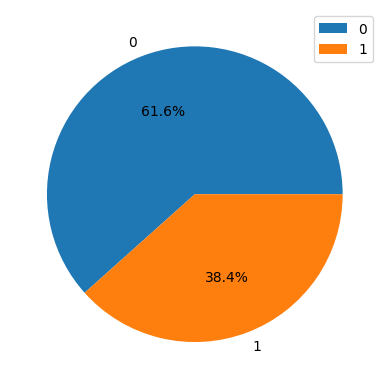

In [417]:
survived_count = train_processed_df['Survived'].value_counts()
survived_labels = survived_count.index
plt.pie(survived_count, labels=survived_labels, autopct='%.1f%%')
plt.legend()
plt.show()

從以上圓餅圖來看，鐵達尼號罹難乘客多於倖存乘客，比例約 6:4

### 乘客年齡比

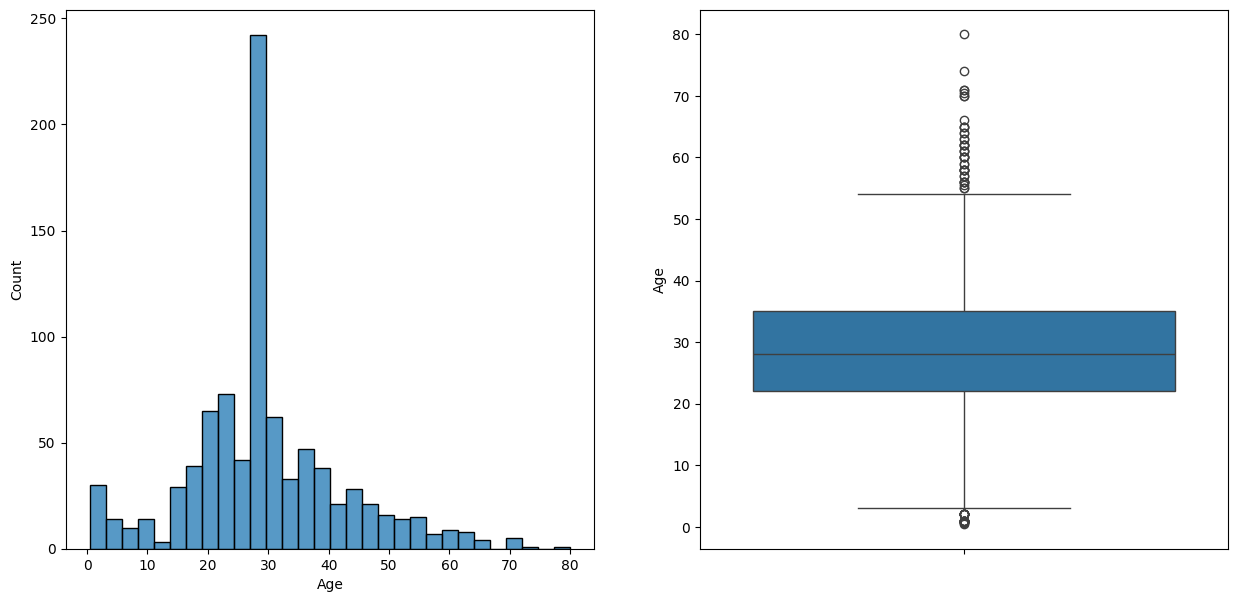

In [418]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(train_processed_df, x='Age', ax=axs[0])
sns.boxplot(train_processed_df, y='Age', ax=axs[1])
plt.show()

大多數乘客年齡位於 20 歲到 40 歲之間，但有不少老年乘客以及嬰兒

### 乘客年齡與是否倖存

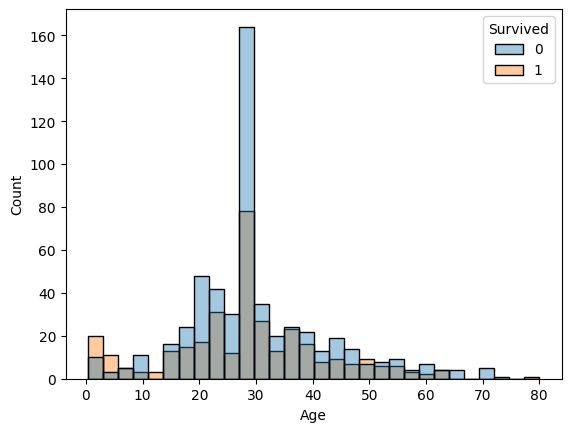

In [419]:
sns.histplot(train_processed_df, x='Age', hue='Survived', alpha=0.4)
plt.show()

從乘客年齡直方圖來看，只有嬰兒群倖存比例較高，絕大部分其餘年齡層都是罹難人數多於倖存人數

### 船票金額分佈

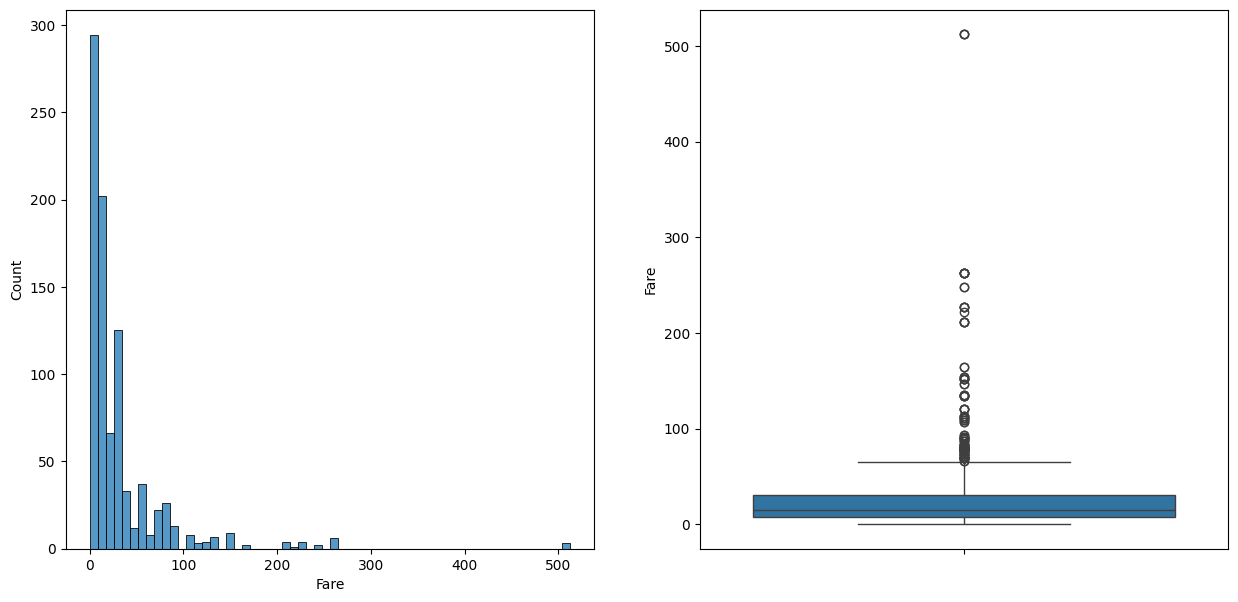

In [420]:
figure, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(train_processed_df, x='Fare', ax=axes[0])
sns.boxplot(train_processed_df, y='Fare', ax=axes[1])
plt.show()

船票金額呈現右偏態分佈，顯示資料集中的大多數船票價格中等，但有一些票價很高的極端值，使得平均值被拉高

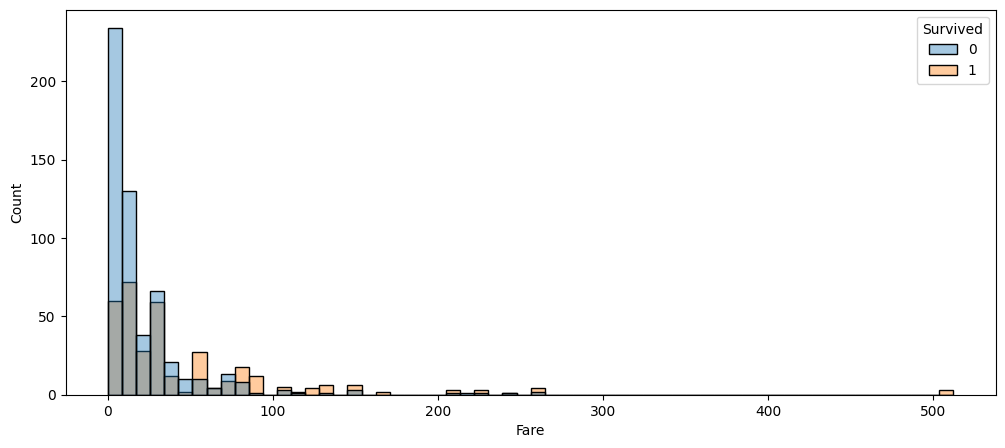

In [421]:
plt.subplots(1, 1, figsize=(12, 5))
sns.histplot(train_processed_df, x='Fare', hue='Survived', alpha=0.4)
plt.show()

### 船艙等級與是否倖存的關係

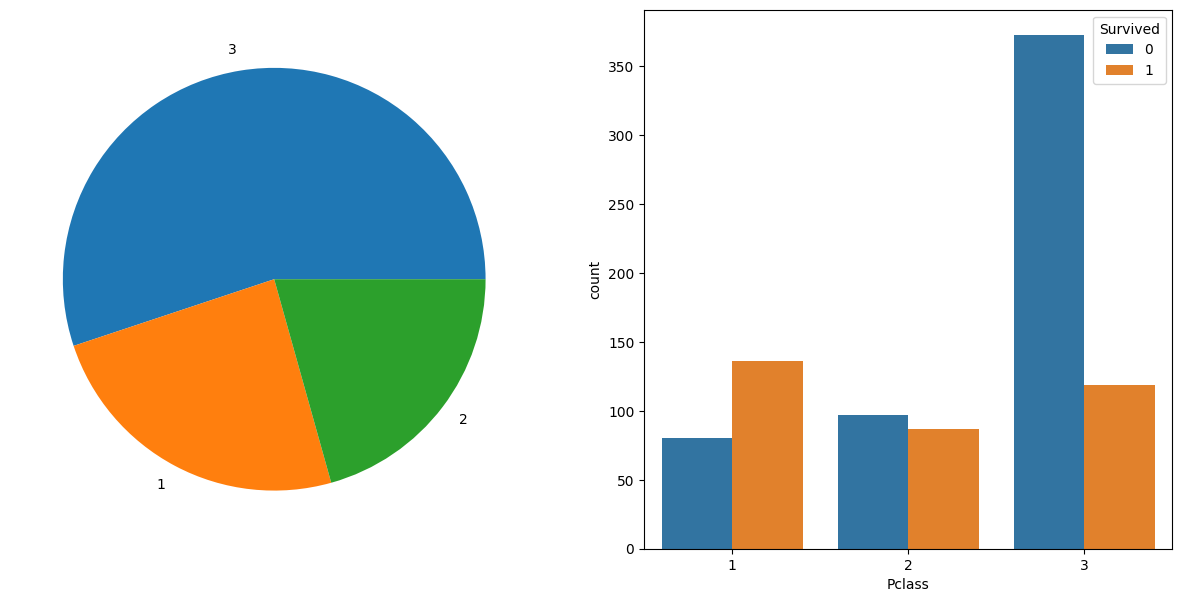

In [422]:
figure, axes = plt.subplots(1, 2, figsize=(15, 7))
pclass_count = train_processed_df['Pclass'].value_counts()
pclass_label = pclass_count.index
axes[0].pie(pclass_count, labels=pclass_label)
sns.countplot(train_processed_df, x='Pclass', hue='Survived', ax=axes[1])
plt.show()

從是否倖存與船艙等級之間的長條圖來看，船艙等級低的乘客中遇難比例更大，船艙等級高的乘客中倖存比例更大

### 性別與是否存活的關係

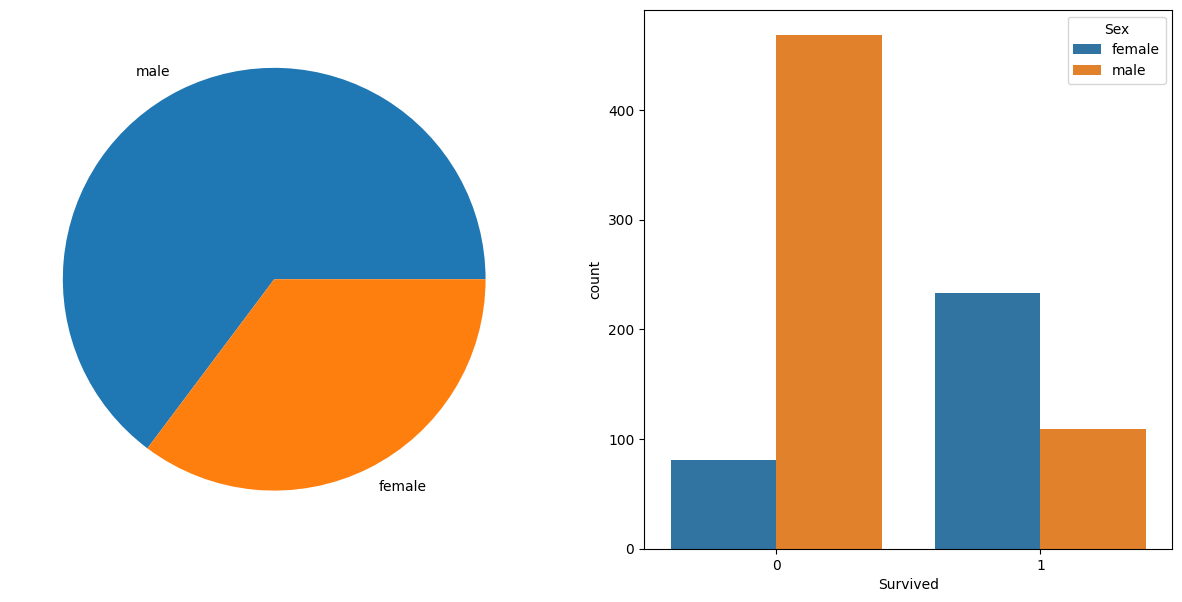

In [423]:
figure, axes = plt.subplots(1, 2, figsize=(15, 7))
sex_count = train_processed_df['Sex'].value_counts()
sex_label = sex_count.index
axes[0].pie(sex_count, labels=sex_label)
sns.countplot(train_processed_df, x='Survived', hue='Sex', ax=axes[1])
plt.show()

從是否倖存與性別之間的長條圖來看，男性乘客中遇難比例更大，女性乘客中倖存比例更大

### 登船港與是否倖存的關係

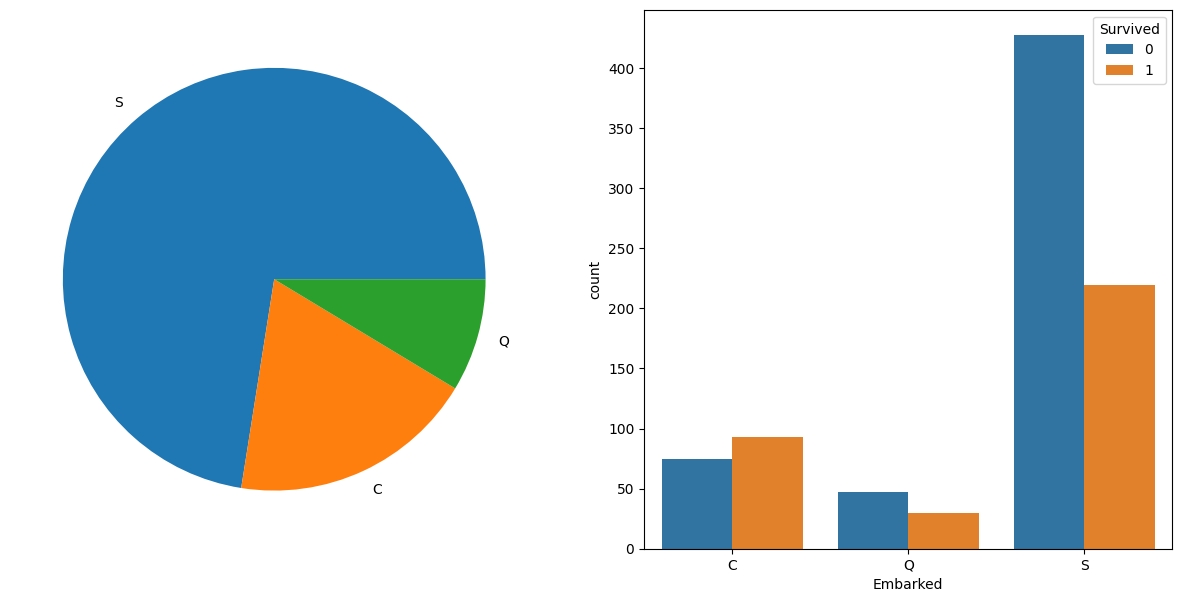

In [424]:
figure, axes = plt.subplots(1, 2, figsize=(15, 7))
embarked_count = train_processed_df['Embarked'].value_counts()
embarked_label = embarked_count.index
axes[0].pie(embarked_count, labels=embarked_label)
sns.countplot(train_processed_df, x='Embarked', hue='Survived', ax=axes[1])
plt.show()

從是否倖存與登船港之間的長條圖來看，瑟堡登船的乘客，倖存數量大於遇難數量，而皇后鎮和南安普敦則相反

### 家庭成員數與是否存活的關係

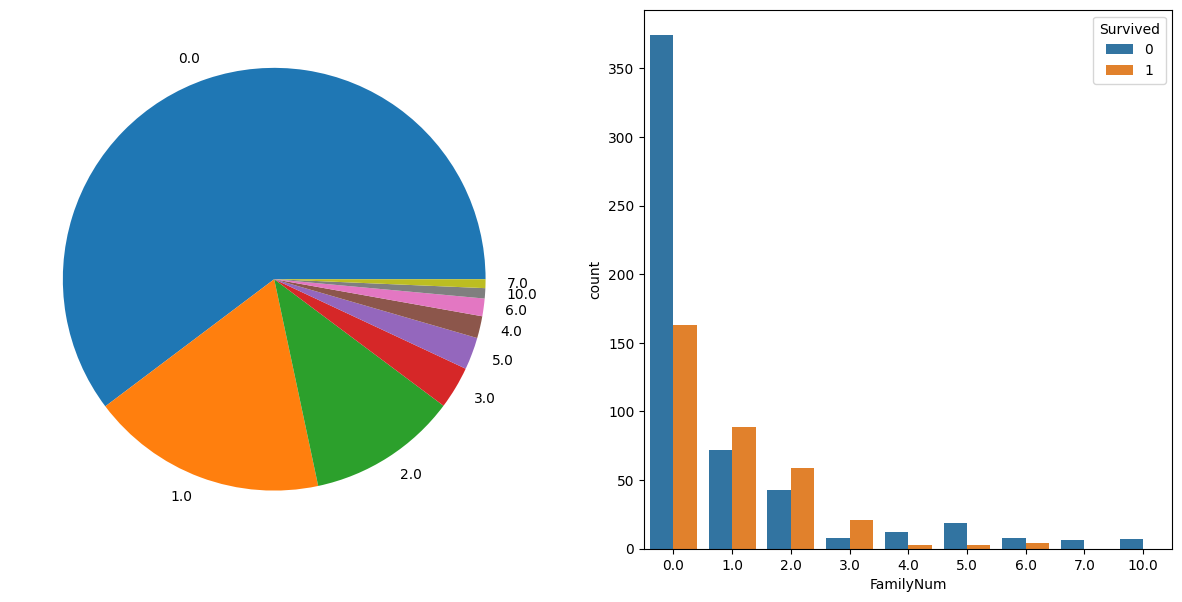

In [425]:
figure, axes = plt.subplots(1, 2, figsize=(15, 7))

train_processed_df['FamilyNum'] = train_processed_df['SibSp'] + train_processed_df['Parch']
familyNum_count = train_processed_df['FamilyNum'].value_counts()
familyNum_label = familyNum_count.index
axes[0].pie(familyNum_count, labels=familyNum_label)
sns.countplot(train_processed_df, x='FamilyNum', hue='Survived', ax=axes[1])
plt.show()

train_processed_df.drop(columns=['FamilyNum'], inplace=True)

從是否倖存與乘客家庭成員之間的長條圖來看，獨身的乘客中遇難的多於倖存的。從有攜帶家庭成員的乘客來看，家庭成員在 1～3 位之間的倖存人數超過遇難人數，但同乘家庭成員超過 3 位後，遇難的更多

### 相關係數圖

各特徵平均值 by Survived:
Survived              0           1
PassengerId  447.016393  444.368421
Age           30.028233   28.291433
SibSp          0.553734    0.473684
Parch          0.329690    0.464912
Fare          22.117887   48.395408


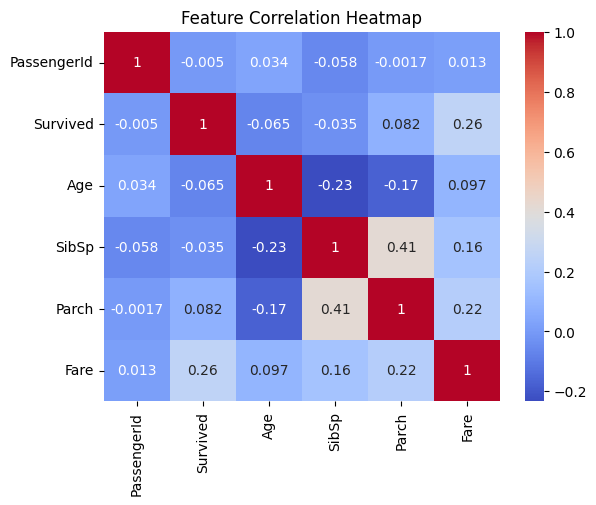

In [426]:
print("各特徵平均值 by Survived:")
print(train_processed_df.groupby('Survived').mean(numeric_only=True).T)

# Correlation heatmap
sns.heatmap(train_processed_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

沒有高度共線性的特徵，故無須其他處理

## 7. 特徵工程

In [427]:
def create_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    return df

In [428]:
def drop_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    drop_columns = ['Name', 'Ticket', 'Cabin']
    df = df.drop(columns=drop_columns)
    
    return df

In [429]:
train_processed_df = create_features(train_processed_df)
train_processed_df = drop_features(train_processed_df)

In [430]:
train_processed_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,1.0,0.0,7.2500,S,1.0
1,2,1,1,female,38.0,1.0,0.0,71.2833,C,1.0
2,3,1,3,female,26.0,0.0,0.0,7.9250,S,0.0
3,4,1,1,female,35.0,1.0,0.0,53.1000,S,1.0
4,5,0,3,male,35.0,0.0,0.0,8.0500,S,0.0


In [431]:
train_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    float64 
 6   Parch        891 non-null    float64 
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    category
 9   FamilySize   891 non-null    float64 
dtypes: category(3), float64(5), int64(2)
memory usage: 51.8 KB


## 8. 模型訓練